In [1]:
using Plots
using Distributions
using SpecialFunctions  # Add this to access the gamma function

In [2]:
include("distributions/Nakagami.jl")

fit_mle (generic function with 62 methods)

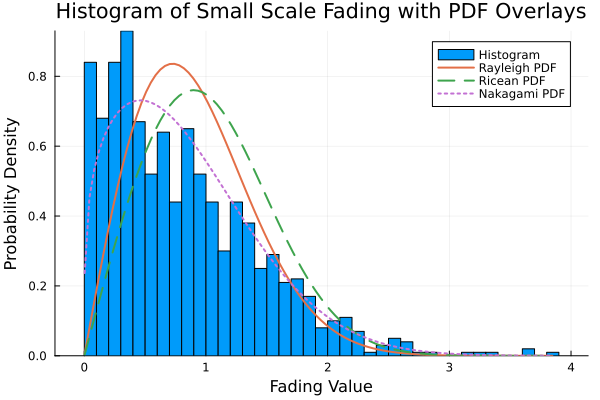

In [3]:


# Generate or import your small scale fading data
# Example: fadingData = randn(1000); # Replace this with your actual data
fadingData = randn(1000)

# Ensure data is non-negative for Nakagami distribution
fadingData = abs.(fadingData)

# Plot the histogram of the fading data
histogram(fadingData, normalize=true, bins=50, label="Histogram", legend=:topright)

# Fit Rayleigh distribution
rayleighDist = fit_mle(Rayleigh, fadingData)
x_values = range(minimum(fadingData), stop=maximum(fadingData), length=100)
pdf_rayleigh = pdf.(rayleighDist, x_values)
plot!(x_values, pdf_rayleigh, label="Rayleigh PDF", linewidth=2)

# Fit Ricean distribution
# Using a rough approximation for initial parameters
s = sqrt(mean(fadingData.^2) / 2) # Approximate s
σ = std(fadingData) # Approximate σ
riceanDist = Rician(s, σ)
pdf_ricean = pdf.(riceanDist, x_values)
plot!(x_values, pdf_ricean, label="Ricean PDF", linewidth=2, linestyle=:dash)

# Fit Nakagami distribution
nakagamiDist = fit_mle(Nakagami, fadingData)
pdf_nakagami = pdf.(nakagamiDist, x_values)
plot!(x_values, pdf_nakagami, label="Nakagami PDF", linewidth=2, linestyle=:dot)

# Customize the plot
title!("Histogram of Small Scale Fading with PDF Overlays")
xlabel!("Fading Value")
ylabel!("Probability Density")
